In [2]:
import pandas as pd
import numpy as np
import sqlite3 as sl
import importlib
from database import db_constants, db_op
# Inline matplotlib (keep charts in this notebook)
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import init
from wine_stat import freq, vis, common_stat
import statsmodels
from data_cleaning.text_filter import TextFilter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mishar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#setup database
cur, con = init.init()
wine_table = db_op.read_table(cur, con, db_constants.WINE_INIT_TABLE_NAME)

*************
Null info for table with name:  temp_wine_data
 - The total number of rows of this table is:  129971 rows
 - The number of nulls in each column is given by:  {'country': 63, 'description': 0, 'designation': 37465, 'points': 0, 'price': 8996, 'province': 63, 'region_1': 21247, 'region_2': 79460, 'taster_name': 26244, 'taster_twitter_handle': 31213, 'title': 0, 'variety': 1, 'winery': 0}
 - The percentage of nulls in each column (rounded to two decimal places) is given by:  {'country': 0.05, 'description': 0.0, 'designation': 28.83, 'points': 0.0, 'price': 6.92, 'province': 0.05, 'region_1': 16.35, 'region_2': 61.14, 'taster_name': 20.19, 'taster_twitter_handle': 24.02, 'title': 0.0, 'variety': 0.0, 'winery': 0.0}
 - The number of rows with no null entries is:  22387 rows
 - The percentage of rows in the table with no null entries is:  17.22%
*************
Based on the null info for out initial dataset, we will drop rows with nulls for the following columns:
     - country,

(-50.0, 3000.0)

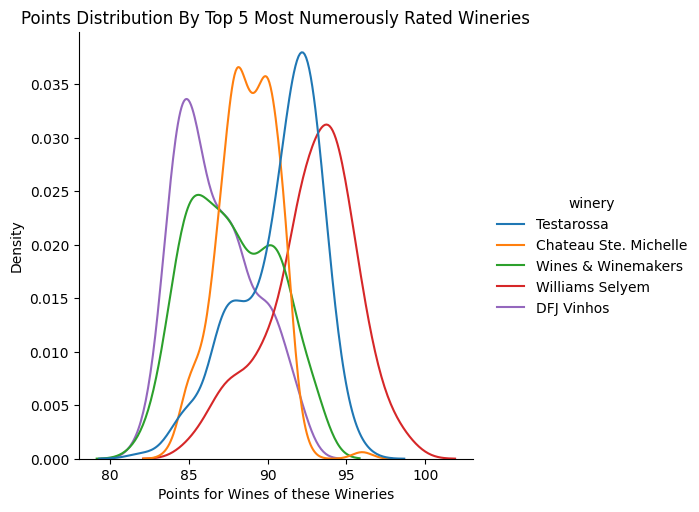

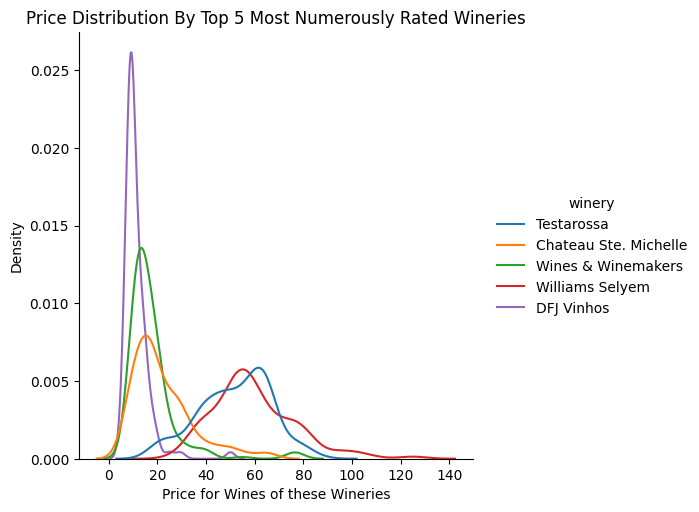

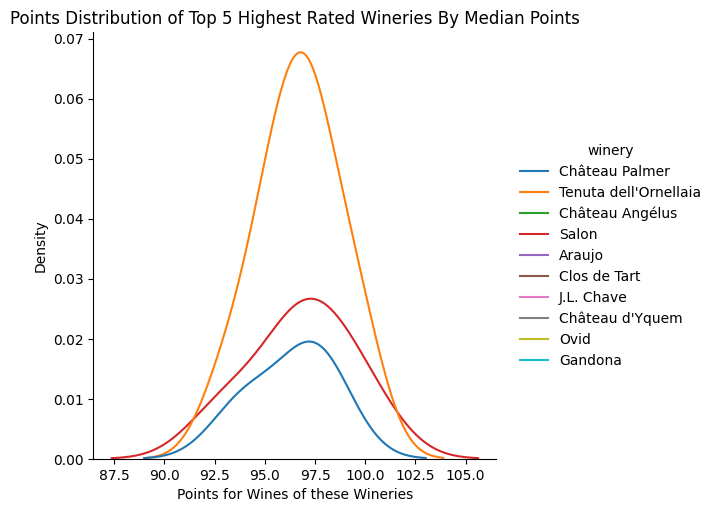

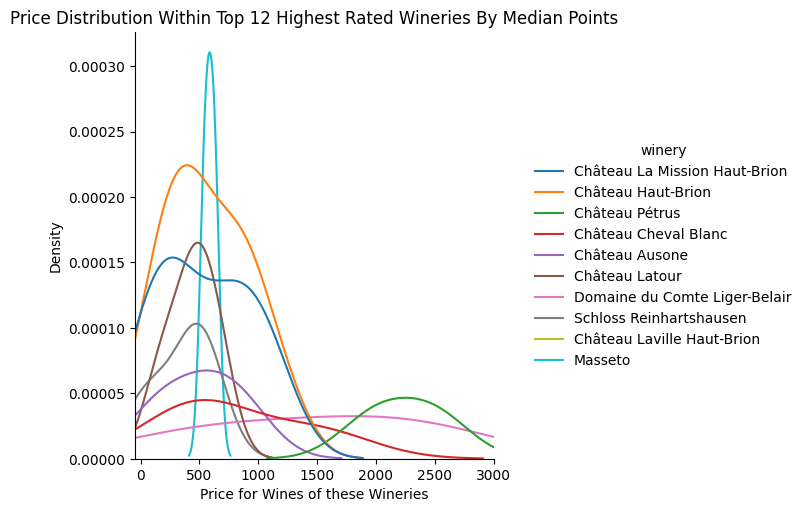

In [13]:
#plot distributions for most numerous 5 wineries
# count points
price_basic_stats_top_wines_dropped_if_appear_once_only = db_op.read_table(cur, con, 'points_basic_stats_grouped_by_winery')
wine_table_top5points_winery = db_op.filter_top_n(cur, con, ['winery'], 'count', 5, df=wine_table, tablename_to_measure_by='points_basic_stats_grouped_by_winery')
sns.displot(wine_table_top5points_winery, x='points', hue='winery', kind='kde', )
plt.title("Points Distribution By Top 5 Most Numerously Rated Wineries")
plt.xlabel("Points for Wines of these Wineries")


# count price
price_basic_stats_top_wines_dropped_if_appear_once_only = db_op.read_table(cur, con, 'price_basic_stats_grouped_by_winery')
wine_table_top5points_winery = db_op.filter_top_n(cur, con, ['winery'], 'count', 5, df=wine_table, tablename_to_measure_by='price_basic_stats_grouped_by_winery')
sns.displot(wine_table_top5points_winery, x='price', hue='winery', kind='kde', )
plt.title("Price Distribution By Top 5 Most Numerously Rated Wineries")
plt.xlabel("Price for Wines of these Wineries")

#plot distributions for most highly rated(by median) 5 wineries
# median points
# NOTE: DON'T USE THIS ONE (DELETE IT/THIS)
price_basic_stats_top_wines_dropped_if_appear_once_only = db_op.read_table(cur, con, 'points_basic_stats_grouped_by_winery')
wine_table_top5points_winery = db_op.filter_top_n(cur, con, ['winery'], 'median', 10, df=wine_table, tablename_to_measure_by='points_basic_stats_grouped_by_winery')
sns.displot(wine_table_top5points_winery, x='points', hue='winery', kind='kde', )
plt.title("Points Distribution of Top 5 Highest Rated Wineries By Median Points")
plt.xlabel("Points for Wines of these Wineries")


# median price
price_basic_stats_top_wines_dropped_if_appear_once_only = db_op.read_table(cur, con, 'price_basic_stats_grouped_by_winery')
wine_table_top5points_winery = db_op.filter_top_n(cur, con, ['winery'], 'median', 12, df=wine_table, tablename_to_measure_by='price_basic_stats_grouped_by_winery')
#filter out that with Chateau les Ormes Sorbet, as not enough data for it
wine_table_top5points_winery = wine_table_top5points_winery[~wine_table_top5points_winery['winery'].str.contains('les Ormes Sorbet')]
#filter out Chateu d'Yquem, as not enough data for it
wine_table_top5points_winery = wine_table_top5points_winery[~wine_table_top5points_winery['winery'].str.contains("d'Yquem")]

sns.displot(wine_table_top5points_winery, x='price', hue='winery', kind='kde', )
plt.title("Price Distribution Within Top 12 Highest Rated Wineries By Median Points")
plt.xlabel("Price for Wines of these Wineries")
plt.xlim(-50, 3000)

(-10.0, 200.0)

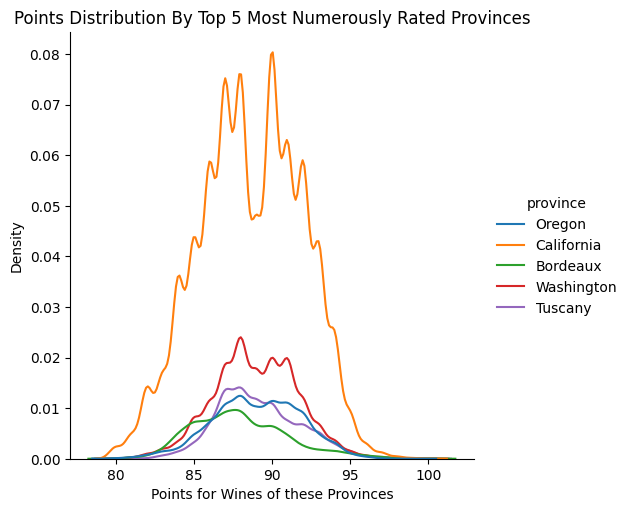

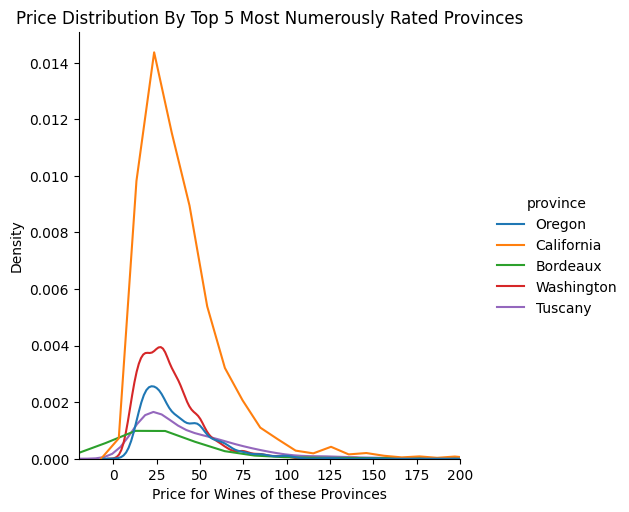

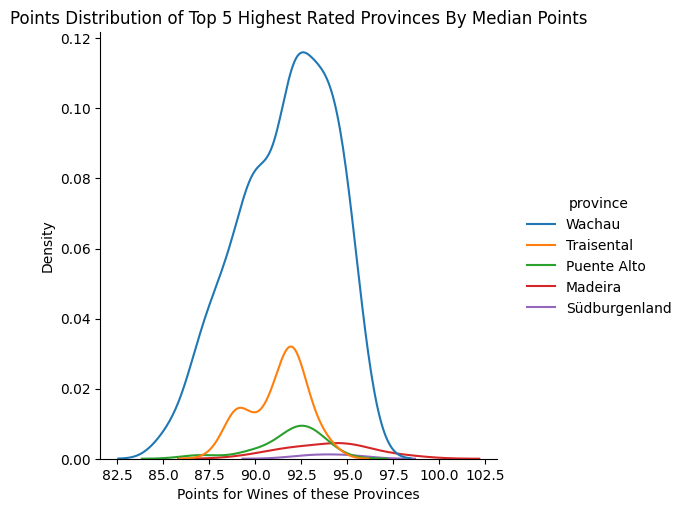

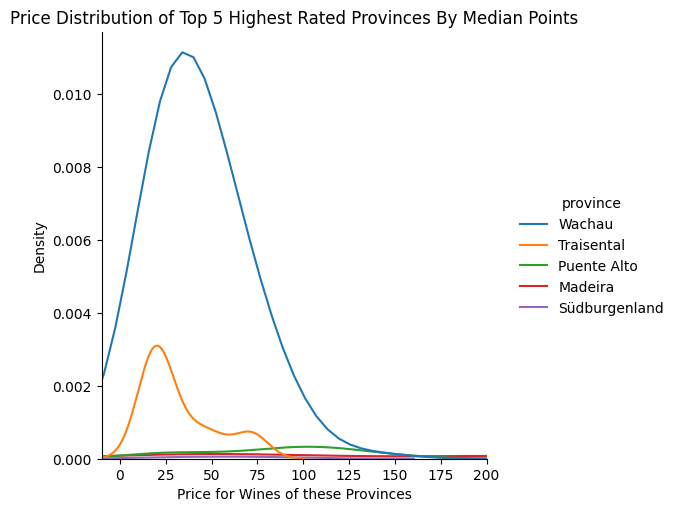

In [25]:
#plot distributions for most numerous 5 provinces
# count points
price_basic_stats_top_wines_dropped_if_appear_once_only = db_op.read_table(cur, con, 'points_basic_stats_grouped_by_province')
wine_table_top5points_province = db_op.filter_top_n(cur, con, ['province'], 'count', 5, df=wine_table, tablename_to_measure_by='points_basic_stats_grouped_by_province')
sns.displot(wine_table_top5points_province, x='points', hue='province', kind='kde', )
plt.title("Points Distribution By Top 5 Most Numerously Rated Provinces")
plt.xlabel("Points for Wines of these Provinces")


# count price
price_basic_stats_top_wines_dropped_if_appear_once_only = db_op.read_table(cur, con, 'price_basic_stats_grouped_by_province')
wine_table_top5points_winery = db_op.filter_top_n(cur, con, ['province'], 'count', 5, df=wine_table, tablename_to_measure_by='price_basic_stats_grouped_by_province')
sns.displot(wine_table_top5points_winery, x='price', hue='province', kind='kde', )
plt.title("Price Distribution By Top 5 Most Numerously Rated Provinces")
plt.xlabel("Price for Wines of these Provinces")
plt.xlim(-20, 200)

#plot distributions for most highly rated(by median) 5 provinces
# median points
price_basic_stats_top_wines_dropped_if_appear_once_only = db_op.read_table(cur, con, 'points_basic_stats_grouped_by_province')
wine_table_top5points_winery = db_op.filter_top_n(cur, con, ['province'], 'median', 5, df=wine_table, tablename_to_measure_by='points_basic_stats_grouped_by_province')
sns.displot(wine_table_top5points_winery, x='points', hue='province', kind='kde', )
plt.title("Points Distribution of Top 5 Highest Rated Provinces By Median Points")
plt.xlabel("Points for Wines of these Provinces")


# median price
price_basic_stats_top_wines_dropped_if_appear_once_only = db_op.read_table(cur, con, 'price_basic_stats_grouped_by_province')
wine_table_top5points_winery = db_op.filter_top_n(cur, con, ['province'], 'median', 5, df=wine_table, tablename_to_measure_by='points_basic_stats_grouped_by_province')
sns.displot(wine_table_top5points_winery, x='price', hue='province', kind='kde', )
plt.title("Price Distribution of Top 5 Highest Rated Provinces By Median Points")
plt.xlabel("Price for Wines of these Provinces")
plt.xlim(-10, 200)

(0.0, 0.019)

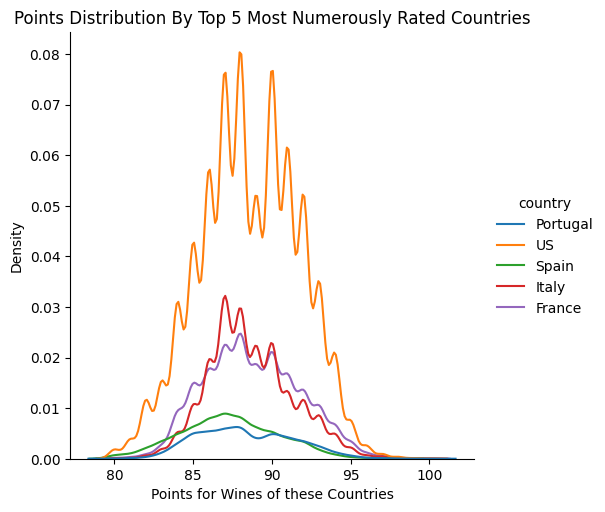

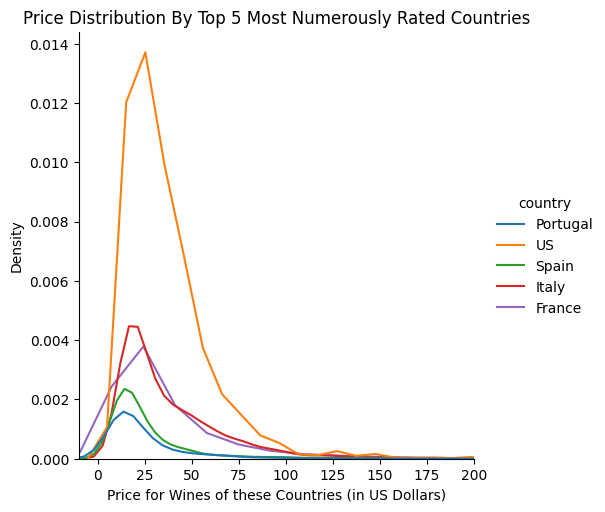

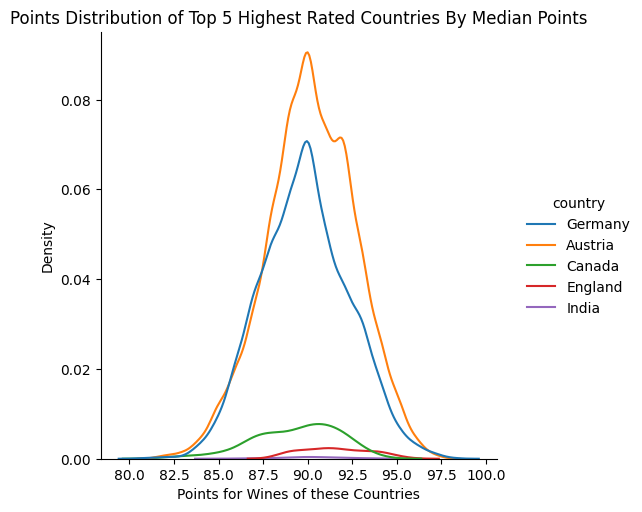

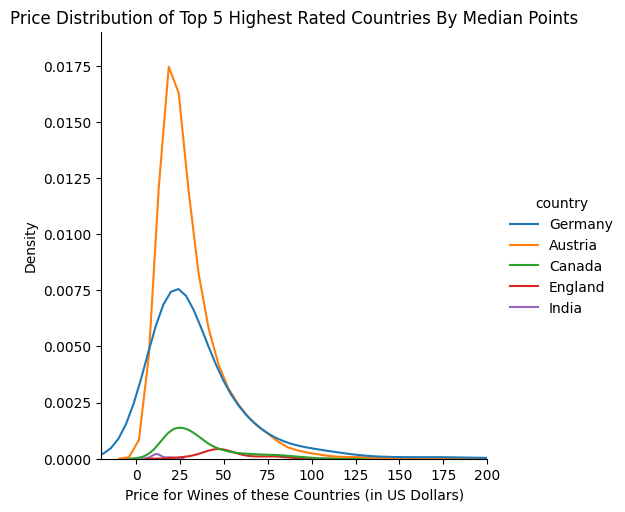

In [33]:
#plot distributions for most numerous 5 countries
col_group_by = 'country'
tablename_to_measure_by_points = f'points_basic_stats_grouped_by_{col_group_by}'
tablename_to_measure_by_price = f'price_basic_stats_grouped_by_{col_group_by}'
# count points
wine_table_top5points_winery = db_op.filter_top_n(cur, con, [col_group_by], 'count', 5, df=wine_table, tablename_to_measure_by=tablename_to_measure_by_price)
sns.displot(wine_table_top5points_winery, x='points', hue=col_group_by, kind='kde', )
plt.title("Points Distribution By Top 5 Most Numerously Rated Countries")
plt.xlabel("Points for Wines of these Countries")

# count price
wine_table_top5points_winery = db_op.filter_top_n(cur, con, [col_group_by], 'count', 5, df=wine_table, tablename_to_measure_by=tablename_to_measure_by_price)
sns.displot(wine_table_top5points_winery, x='price', hue=col_group_by, kind='kde', )
plt.title("Price Distribution By Top 5 Most Numerously Rated Countries")
plt.xlabel("Price for Wines of these Countries (in US Dollars)")
plt.xlim(-10, 200)

#plot distributions for most highly rated(by median) 5 countries
# median points
wine_table_top5points_winery = db_op.filter_top_n(cur, con, [col_group_by], 'median', 5, df=wine_table, tablename_to_measure_by=tablename_to_measure_by_points)
sns.displot(wine_table_top5points_winery, x='points', hue=col_group_by, kind='kde', )
plt.title("Points Distribution of Top 5 Highest Rated Countries By Median Points")
plt.xlabel("Points for Wines of these Countries")

# median price
wine_table_top5points_winery = db_op.filter_top_n(cur, con, [col_group_by], 'median', 5, df=wine_table, tablename_to_measure_by=tablename_to_measure_by_points)
sns.displot(wine_table_top5points_winery, x='price', hue=col_group_by, kind='kde', )
plt.title("Price Distribution of Top 5 Highest Rated Countries By Median Points")
plt.xlabel("Price for Wines of these Countries (in US Dollars)")
plt.xlim(-20, 200)
plt.ylim(0, 0.019)

         index country                                        description  \
9           10      US  Soft, supple plum envelopes an oaky structure ...   
48          55      US  This shows jelly-like flavors of orange and pe...   
53          60      US  Syrupy and dense, this wine is jammy in plum a...   
68          75      US  This is made from equal parts Cabernet Franc a...   
76          84      US  A healthy addition of 13% Petite Sirah provide...   
...        ...     ...                                                ...   
120803  129854      US  Maldonado is set in a fairly cool area of the ...   
120845  129899      US  Aged entirely in stainless steel, this combine...   
120851  129906      US  Pencil shaving and graphite notes lend a class...   
120894  129949      US  There's no bones about the use of oak in this ...   
120895  129950      US  This opens with herbaceous dollops of thyme an...   

               designation  points  price    province     region_1 region_2

3090

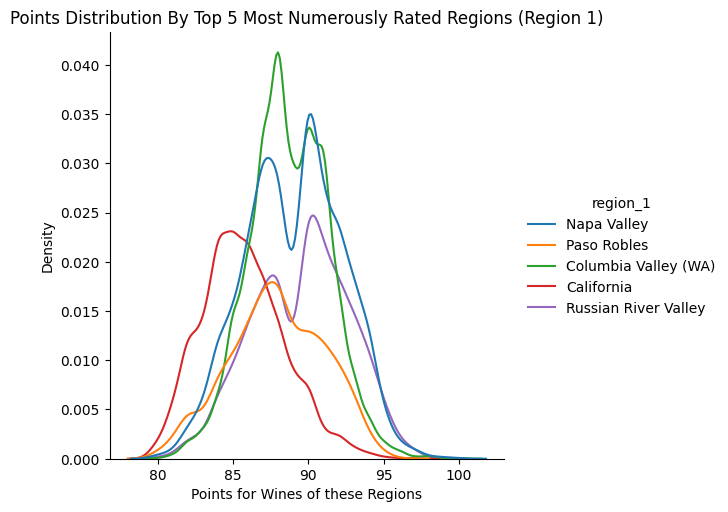

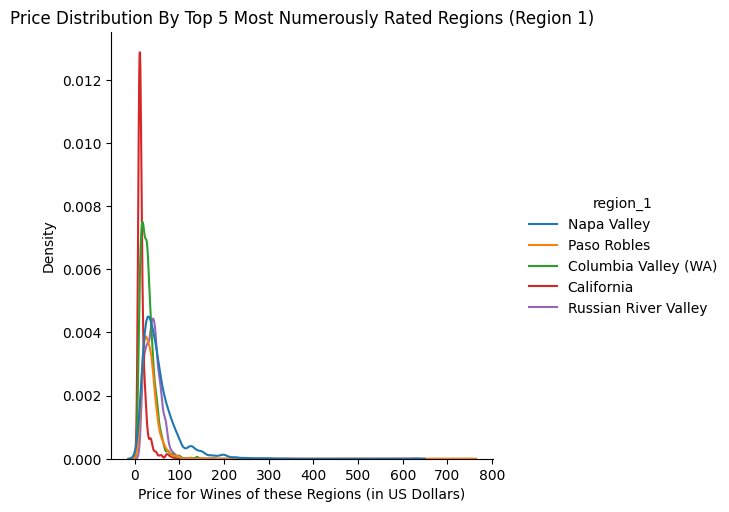

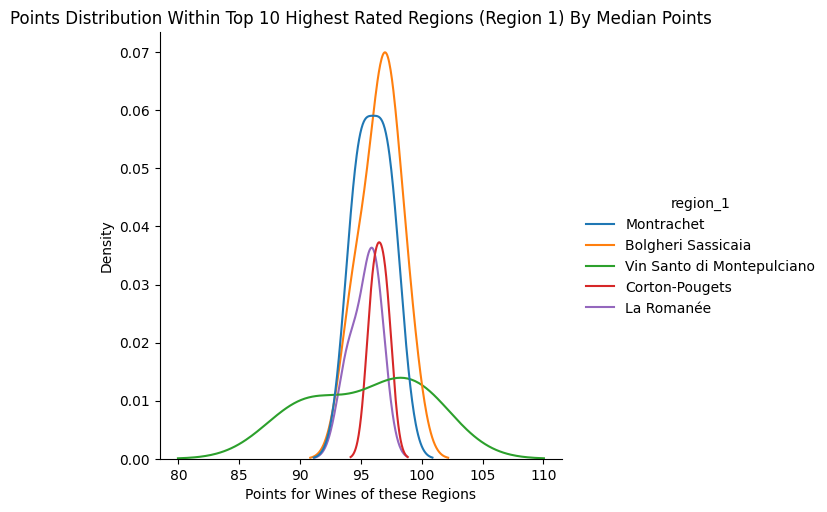

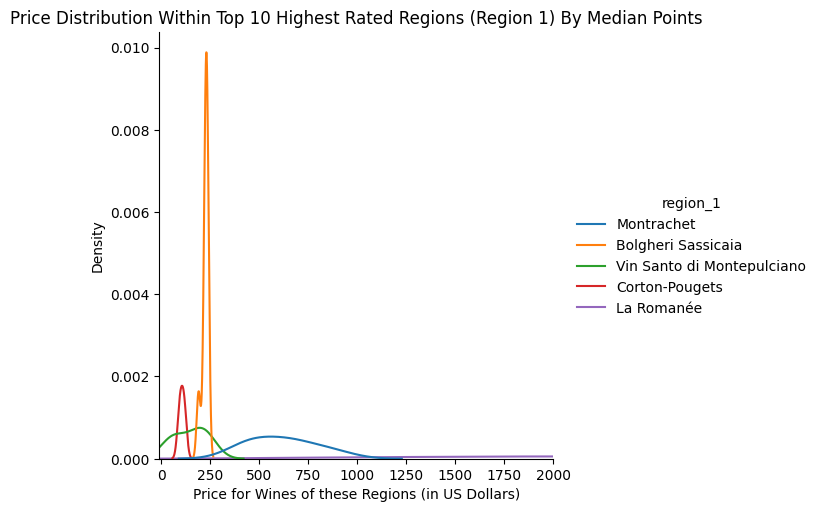

In [68]:
#plot distributions for most numerous 5 countries
col_group_by = 'region_1'
tablename_to_measure_by_points = f'points_basic_stats_grouped_by_{col_group_by}'
tablename_to_measure_by_price = f'price_basic_stats_grouped_by_{col_group_by}'
# count points
wine_table_top5points_winery = db_op.filter_top_n(cur, con, [col_group_by], 'count', 5, df=wine_table, tablename_to_measure_by=tablename_to_measure_by_price)
sns.displot(wine_table_top5points_winery, x='points', hue=col_group_by, kind='kde', )
plt.title("Points Distribution By Top 5 Most Numerously Rated Regions (Region 1)")
plt.xlabel("Points for Wines of these Regions")

# count price
wine_table_top5points_winery = db_op.filter_top_n(cur, con, [col_group_by], 'count', 5, df=wine_table, tablename_to_measure_by=tablename_to_measure_by_price)
sns.displot(wine_table_top5points_winery, x='price', hue=col_group_by, kind='kde', )
plt.title("Price Distribution By Top 5 Most Numerously Rated Regions (Region 1)")
plt.xlabel("Price for Wines of these Regions (in US Dollars)")

#plot distributions for most highly rated(by median) 5 countries 
# median points
wine_table_top5points_winery = db_op.filter_top_n(cur, con, [col_group_by], 'median', 9, df=wine_table, tablename_to_measure_by=tablename_to_measure_by_points)
#exclude Clos de Tart and Bienvenues-Ba^tard-Montrachet as not enough data for them, and Napa-Monterey-Mendocino
wine_table_top5points_winery = wine_table_top5points_winery[~wine_table_top5points_winery[col_group_by].str.contains('Clos de Tart')]
wine_table_top5points_winery = wine_table_top5points_winery[~wine_table_top5points_winery[col_group_by].str.contains('tard-Montrachet')]
wine_table_top5points_winery = wine_table_top5points_winery[~wine_table_top5points_winery[col_group_by].str.contains('Napa-Monterey-Mendocino')]
wine_table_top5points_winery = wine_table_top5points_winery[~wine_table_top5points_winery[col_group_by].str.contains('Clos de Lambrays')]

sns.displot(wine_table_top5points_winery, x='points', hue=col_group_by, kind='kde', )
plt.title("Points Distribution Within Top 10 Highest Rated Regions (Region 1) By Median Points")
plt.xlabel("Points for Wines of these Regions")

# median price
sns.displot(wine_table_top5points_winery, x='price', hue=col_group_by, kind='kde', )
plt.title("Price Distribution Within Top 10 Highest Rated Regions (Region 1) By Median Points")
plt.xlabel("Price for Wines of these Regions (in US Dollars)")
plt.xlim(-10, 2000)

#print some info about similar pattern in points distribution for Napa Valley, Columbia Valley (WA), and Russian River Valley
wine_table_nonnull_region1s = wine_table.dropna(subset=[col_group_by])
napa_df = wine_table_nonnull_region1s[wine_table_nonnull_region1s[col_group_by].str.contains('Napa Valley')]
colum_df = wine_table_nonnull_region1s[wine_table_nonnull_region1s[col_group_by].str.contains('Columbia Valley (WA)')]
russ_df = wine_table_nonnull_region1s[wine_table_nonnull_region1s[col_group_by].str.contains('Russian River Valley')]
print(napa_df)
print(colum_df)
print(russ_df)
napa_df.to_sql('napa_df_nonnull', con, if_exists='replace')
colum_df.to_sql('colum_df_nonnull', con, if_exists='replace')
russ_df.to_sql('russ_df_nonnull', con, if_exists='replace')